In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import seaborn as sns
import numpy as np

In [2]:
def plot_cv_img(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Gaussian Blurred')
    ax[1].axis('off')
    plt.show()

In [169]:
# read an image
img = cv2.imread('pikachu.jpg')

# apply gaussian blur,
# kernel of size 5x5,
# change here for other sizes
kernel_size = (7, 7)

# sigma values are same in both direction
blur = cv2.GaussianBlur(img, kernel_size, 1.5, 100)

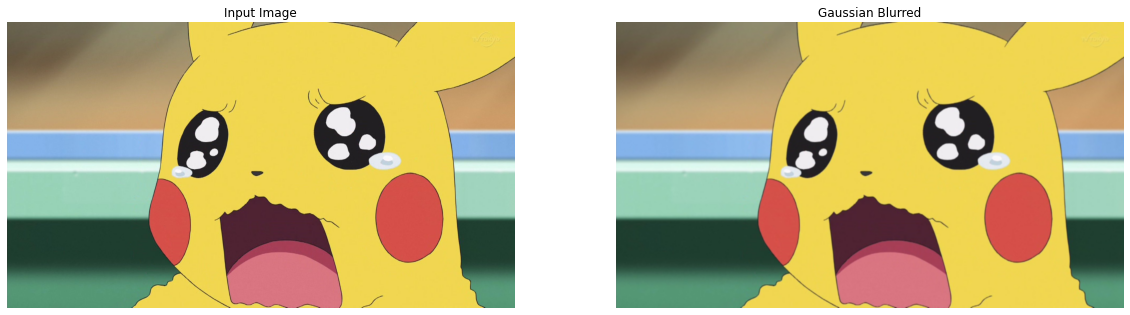

In [170]:
plot_cv_img(img, blur)

In [5]:
blur.shape, img.shape

((1080, 1920, 3), (1080, 1920, 3))

In [6]:
def gaussian(x, nu, sigma):
    return 1 / math.sqrt(2 * math.pi * (sigma ** 2)) * math.e ** (- (x - nu) ** 2 / (2 * (sigma ** 2)))

In [7]:
kernel_radius = 3
kernel_size = kernel_radius * 2 + 1
mu = kernel_radius
sigmaX = kernel_radius / 2
sigmaY = sigmaX

In [8]:
hkernel = [gaussian(x, mu, sigmaX) for x in range(kernel_size)]
vkernel = [gaussian(y, mu, sigmaX) for y in range(kernel_size)]

In [27]:
kernel = [[x * y for x in hkernel] for y in vkernel]

<AxesSubplot:>

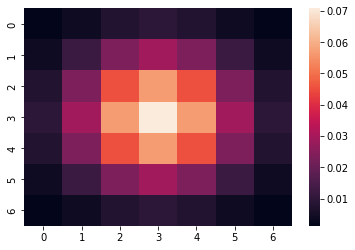

In [28]:
sns.heatmap(kernel)

In [29]:
kernel_sum = sum(sum(el) for el in kernel)
kernel_sum

0.965424643340064

In [30]:
kernel = [[el / kernel_sum for el in row] for row in kernel]
sum(sum(el) for el in kernel)

0.9999999999999998

<AxesSubplot:>

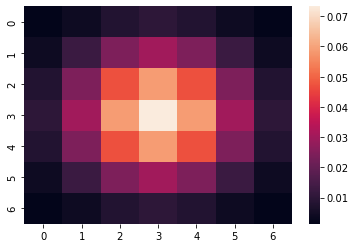

In [52]:
sns.heatmap(kernel)

In [65]:
def create_kernel(kernel_size, sigmaX, sigmaY=None):
    
    kernel_radius = kernel_size // 2
    sigmaX = sigmaX or kernel_radius / 2
    sigmaY = sigmaY or sigmaX
    mu = kernel_radius
    
    hkernel = [gaussian(x, mu, sigmaX) for x in range(kernel_size)]
    vkernel = [gaussian(y, mu, sigmaY) for y in range(kernel_size)]
    
    kernel = [[x * y for x in hkernel] for y in vkernel]
    
    kernel = [[el / kernel_sum for el in row] for row in kernel]
    
    return kernel

<AxesSubplot:>

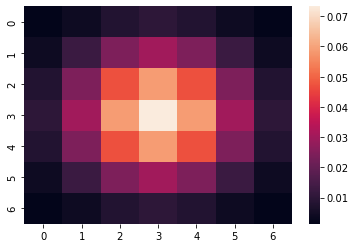

In [66]:
sns.heatmap(create_kernel(7, 0))

In [67]:
img[0:kernel_size, 0:kernel_size, 0]

array([[85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75],
       [85, 85, 83, 80, 77, 75, 75]], dtype=uint8)

In [135]:
def multiply(a, b):
#     res = 0
    
#     for i in range(len(a)):
#         for j in range(len(a[i])):
#             res += a[i][j] * b[i][j]
            
#     return round(res)

    res = np.multiply(a, b)
    
    return round(np.sum(res))

In [136]:
kernel = np.array(kernel)

In [137]:
multiply(img[0:kernel_size, 0:kernel_size, 0], kernel)

80

In [35]:
img.shape

(1080, 1920, 3)

In [120]:
a = np.array([1, 2, 3])
np.hstack([a, [0, 0]])

array([1, 2, 3, 0, 0])

In [121]:
def add_padding(a, kernel_size):
    kernel_radius = kernel_size // 2
    a_copy = []
    
    for _ in range(kernel_radius):
        a_copy.append([0 for _ in range(len(a[0]) + kernel_size - 1)])
    
    for el in a:
        a_copy.append([0] * kernel_radius + list(el) + [0] * kernel_radius)
        
    for _ in range(kernel_radius):
        a_copy.append([0 for _ in range(len(a[0]) + kernel_size - 1)])
        
    return np.array(a_copy)

In [105]:
a = [[1, 2, 3], [6, 7, 8]]
add_padding(a, 5)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 3, 0, 0],
       [0, 0, 6, 7, 8, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [152]:
output = np.zeros(img.shape, dtype='uint8')

In [154]:
output.shape

(1080, 1920, 3)

In [108]:
img.shape

(1080, 1920, 3)

In [130]:
img_r = add_padding(img[:, :, 0], kernel_size)
img_g = add_padding(img[:, :, 1], kernel_size)
img_b = add_padding(img[:, :, 2], kernel_size)

In [155]:
for i in range(output.shape[0]):
    for j in range(output.shape[1]):
        r = multiply(img_r[i : i + kernel_size, j : j + kernel_size], kernel)
        g = multiply(img_g[i : i + kernel_size, j : j + kernel_size], kernel)
        b = multiply(img_b[i : i + kernel_size, j : j + kernel_size], kernel)
        
        output[i][j] = [r, g, b]

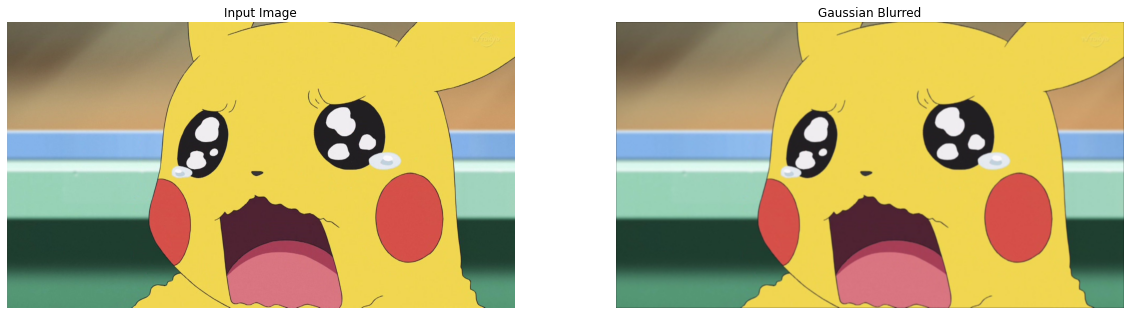

In [156]:
plot_cv_img(img, output)